**Task 2:** Find a data set which is suitable for classification (you can use one of the data sets which you used in Homework II) with **numerical features** only (if the data set involves categorical ones in addition to numerical ones, you can drop the categorical ones). Build a [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) classifier with `penalty=None` which requires scaling of numerical features with [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) and dimension reduction of numerical features with [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html). Show us the workflow and report the accuracy of the resulting model on the unseen data.


#### Instructions to follow:

- Include all your codes here. Be sure that your code is CLEAN, READABLE, and REPRODUCIBLE.
- Put your data set into a **datasets** folder.
- Put your images (if available) into an **images** folder.
- Please return a NICE and CLEAR homework. Otherwise, it will not be graded.
- Please write YOUR OWN code. **DO NOT copy** my codes or someone else's codes.
- Please **DO NOT use** IRIS data set or Breast Cancer data set for this task.

## Data Decription

- Import and introduce your data set here.

The Room Occupancy data set (can be found [here](https://www.kaggle.com/datasets/sachinsharma1123/room-occupancy)) contains 5 features and a target variable. These 5 features determine whether the room is occupied or not.
The column names are:
- Temperature: The temperature of the room in celcius.
- Humidity: Relative humidity of the room in %.
- Light: The amount of light in the room in lux.
- CO2: The amount of carbondioxide in the room in ppm.
- HumidityRatio: Humidity ratio, derived quantity from temperature and relative humidity, in kgwater-vapor/kg-air.
- Occupancy: Occupancy of the room, 0 for not occupied, 1 for occupied status.

In [74]:
import pandas as pd
room = pd.read_csv("datasets/Room_Occupancy.csv")
room.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,23.7000,26.272,585.200000,749.200000,0.004764,1
1,23.7180,26.290,578.400000,760.400000,0.004773,1
2,23.7300,26.230,572.666667,769.666667,0.004765,1
3,23.7225,26.125,493.750000,774.750000,0.004744,1
4,23.7540,26.200,488.600000,779.000000,0.004767,1


In [75]:
room.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2665 entries, 0 to 2664
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temperature    2665 non-null   float64
 1   Humidity       2665 non-null   float64
 2   Light          2665 non-null   float64
 3   CO2            2665 non-null   float64
 4   HumidityRatio  2665 non-null   float64
 5   Occupancy      2665 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 125.1 KB


In [76]:
room = room.drop_duplicates()
room.shape

(2583, 6)

In [77]:
X = room.drop(["Occupancy"], axis=1)
y = room[["Occupancy"]]

In [78]:
X.corr()

,Temperature,Humidity,Light,CO2,HumidityRatio
Temperature,1.000000,0.711831,0.764141,0.867297,0.892671
Humidity,0.711831,1.000000,0.555120,0.911464,0.950942
Light,0.764141,0.555120,1.000000,0.764591,0.688089
CO2,0.867297,0.911464,0.764591,1.000000,0.964322
HumidityRatio,0.892671,0.950942,0.688089,0.964322,1.000000


Text(0.5, 1.0, 'Heatmap of the Correlation Matrix')

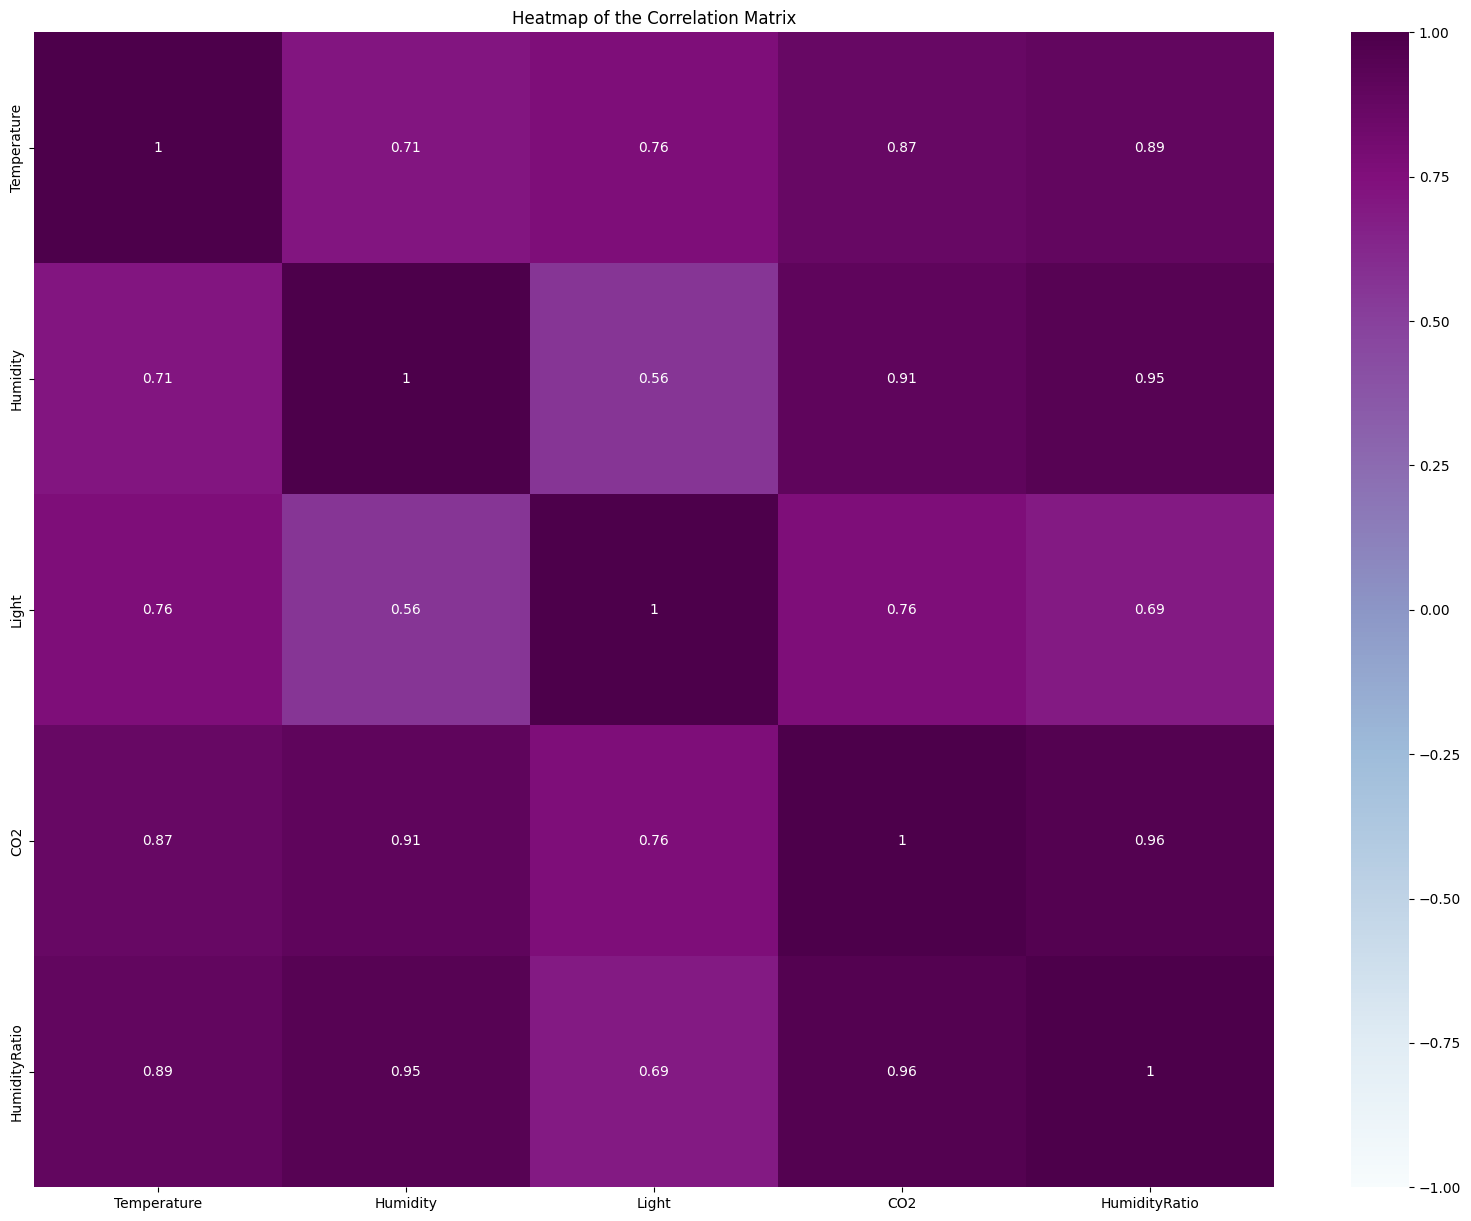

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 15))
sns.heatmap(X.corr(), cmap='BuPu', annot=True, vmin=-1, vmax=1)
plt.title('Heatmap of the Correlation Matrix')

## Pre-processing
- Split your data into train and test sets.
- Scale your numerical features with [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) here.
- Reduce the dimension of you scaled features with [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) here by applying principal components to your scaled data set.
- While applying PCA, show us how you selected the best number of principal components for this data set.

#### - Data splitting

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True, random_state=2002)

In [81]:
X_train.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio
count,2066.000000,2066.000000,2066.000000,2066.000000,2066.000000
mean,21.457755,25.416300,201.484312,726.379747,0.004043
std,1.027858,2.451835,252.118472,294.414500,0.000613
min,20.200000,22.100000,0.000000,427.600000,0.003303
25%,20.675000,23.290000,0.000000,467.270833,0.003543
50%,20.972500,25.000000,0.000000,595.166667,0.003835
75%,22.390000,27.000000,444.000000,973.900000,0.004544
max,24.408333,31.472500,1697.250000,1402.250000,0.005378


#### - Data scaling

In [82]:
from sklearn import set_config
set_config(transform_output="pandas")

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [83]:
X_train_scaled = scaler.transform(X_train) 

In [84]:
X_train_scaled.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio
count,2.066000e+03,2.066000e+03,2.066000e+03,2.066000e+03,2.066000e+03
mean,-2.434967e-15,2.140914e-16,-2.751376e-17,6.083119e-17,-2.441846e-16
std,1.000242e+00,1.000242e+00,1.000242e+00,1.000242e+00,1.000242e+00
min,-1.223962e+00,-1.352906e+00,-7.993587e-01,-1.015073e+00,-1.206137e+00
25%,-7.617246e-01,-8.674380e-01,-7.993587e-01,-8.802951e-01,-8.150664e-01
50%,-4.722177e-01,-1.698324e-01,-7.993587e-01,-4.457826e-01,-3.388546e-01
75%,9.071974e-01,6.460806e-01,9.621445e-01,8.409239e-01,8.164850e-01
max,2.871303e+00,2.470666e+00,5.934225e+00,2.296198e+00,2.176598e+00


In [85]:
X_test_scaled = scaler.transform(X_test)

#### - Principal Component Analysis

In [86]:
from sklearn.decomposition import PCA

pca = PCA()

We need to get the loading vectors (rotation matrix) to learn the rotation matrix.

In [87]:
pca.fit(X_train_scaled)

PCA()

In [88]:
rotation_matrix = pd.DataFrame(pca.components_.T, 
                       index=X_train_scaled.columns, 
                       columns=['Load_vec1', 'Load_vec2',  'Load_vec3', 'Load_vec4', 'Load_vec5'])                                                                             
rotation_matrix

,Load_vec1,Load_vec2,Load_vec3,Load_vec4,Load_vec5
Temperature,0.447361,0.221175,-0.789329,0.109405,-0.340500
Humidity,0.439424,-0.535357,0.364655,0.378282,-0.494195
Light,0.391180,0.769782,0.461206,0.203949,0.010354
CO2,0.476544,-0.095545,0.137394,-0.862498,-0.031588
HumidityRatio,0.476087,-0.250561,-0.111350,0.243794,0.799203


We now have the information to form our Z (the representation matrix).

In [89]:
representation_matrix = pca.transform(X_train_scaled)
representation_matrix.columns = ["PC1", "PC2", "PC3", "PC4", "PC5"]
representation_matrix.head()

,PC1,PC2,PC3,PC4,PC5
1663,3.377351,-0.745033,0.284650,-0.011460,0.025319
1286,2.348893,0.343121,0.512887,-0.315183,-0.031129
2537,0.048919,0.708417,0.813236,0.111717,-0.016631
1658,3.448603,-0.822457,0.306652,0.026043,0.029687
1574,4.027597,-0.996736,0.400557,-0.182549,0.042381


After pca, we should check the correlation of the representation matrix.

In [90]:
representation_matrix.corr().round(3)

,PC1,PC2,PC3,PC4,PC5
PC1,1.0,0.0,0.0,-0.0,0.0
PC2,0.0,1.0,-0.0,0.0,0.0
PC3,0.0,-0.0,1.0,-0.0,-0.0
PC4,-0.0,0.0,-0.0,1.0,-0.0
PC5,0.0,0.0,-0.0,-0.0,1.0


As it can be observed here, principal components have no relation with each other.

#### - Choosing the number of the principal components

In [91]:
pca.explained_variance_ratio_

array([8.49197995e-01, 1.03369272e-01, 3.99421554e-02, 7.33238851e-03,
       1.58188493e-04])

We can make a scree plot to choose the number of components in pca.

Text(0.5, 1.0, 'Scree Plot')

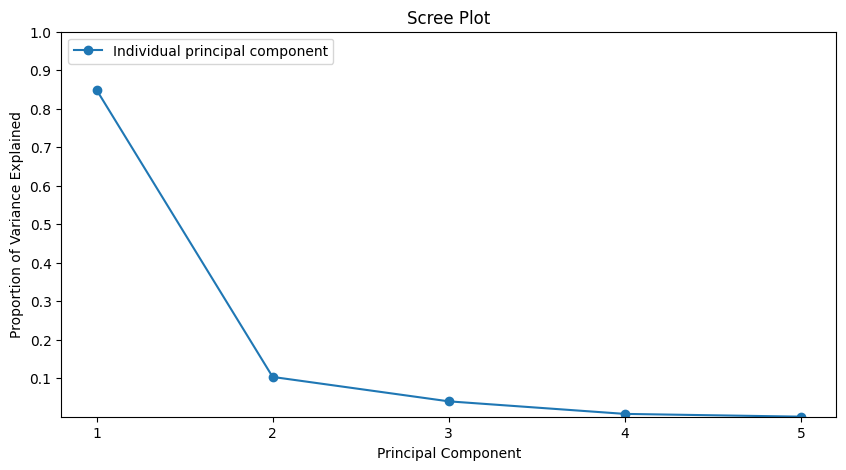

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [10, 5]

plt.plot([1,2,3,4,5], pca.explained_variance_ratio_, marker='o', label='Individual principal component')

plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.ylim(0,1)
plt.xticks([1,2,3,4,5])
plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
plt.legend(loc=2)
plt.title('Scree Plot')

Now, I am going to instantiate the pca again with n_components=1.

Dimension reduced data:

In [93]:
pca2 = PCA(n_components=1)
X_train_pca = pca2.fit_transform(X_train_scaled)
X_test_pca = pca2.transform(X_test_scaled)

## Visualization

- Take the first two principal components you found, namely principal component 1 and 2,  and visualize these two principal components in the train and test data with respect to class labels of the sample points, separetely. 
- If possible, comment on the visualization to tell us how class labels are changing respect to principal component 1 and 2.
- Based on these plots, can you make a guess whether logistic regression will result in a higher accuracy in train and test data? (If you found out that the appropriate number of principal components is larger than 2, of course, the visualization you have just done cannot reveal the real story). But, in any way, tell us whether you expect a higher accuracy or not before implementing your classifier below.

## Classifier Implementation

- Implement your classifier to your pre-processed (scaled + dimension reduced) data here. 

In [94]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty=None)
lr.fit(X_train_pca, y_train.values.ravel())

LogisticRegression(penalty=None)

## Conclusion

- Report the accuracy of the built classifier on the train and test data, respectively. Comment on whether model needs any improvement due to under-fitting or over-fitting. If so, provide a suggestion.

In [95]:
print("Accuracy on train data: %.4f" % lr.score(X_train_pca, y_train))

Accuracy on train data: 0.8756


In [96]:
print("Accuracy on test data: %.4f" % lr.score(X_test_pca, y_test))

Accuracy on test data: 0.8820


The accuracy scores on the train and the test data are very close to each other. So, this model is good.

Hint: In this example, you have to apply two pre-processing approaches to your training data sequentially. When you are doing this, please be sure that you are **avoiding data leakage**. I want to see whether you got the one of the main ideas of this course in this last homework.

## References
- https://www.kaggle.com/datasets/sachinsharma1123/room-occupancy
- https://github.com/MAT388E-Spring23/Lecture_Materials/tree/main Gül İnan Lecture Slides. 